### Dead Cat Bounce 

A dead cat bounce is a small, short lived recovery in the price of a declining security after a significant downward trend. For example, the market (or an individual stock) has been falling over the last ten weeks but there is a broad market rally in week 11. The rally is considered a dead cat bounce if it's short-lived and the market continues to fall again in week 12. Most of the time, waffling causes a dead cat bounce. During a long downward slide, some investors may think that the market or a particular security has bottomed out. They begin buying instead of selling, or some may be closing out their short positions and pocketing gains. These factors create a little buying momentum, albeit brief. After this buying momentum is over, the stock falls again. Dead cat bounce candidates can also be identified over shorter time frames, e.g a stock that drops 5% one day and rises 3% the next

Using the code in dead_cat.py and yahoo_finance.py I obtained data from the quandl api and the yahoo finance api. After calculating the metrics I needed, I stored the data in a consolidated CSV file. 

In [96]:
import re
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import style
import requests
import json 
import random
import csv
%matplotlib inline
style.use('ggplot')

In [129]:
# Drop extra index column and any 'inf' values

project_df = pd.read_csv('CONSOLIDATED_DCB_DATA.csv')
project_df = project_df.drop(project_df.columns[[0]],axis=1)
project_df = project_df[np.isfinite(project_df['Chg_from_50davg'])]
project_df['Is_Dead_Cat'] = project_df['Is_Dead_Cat'].astype('str')
project_df.head()
print project_df.dtypes

Ticker              object
Chg_from_Hi        float64
Chg_from_Lo        float64
Chg_from_50davg    float64
Short_Ratio        float64
Is_Dead_Cat         object
dtype: object


In [110]:
project_df.tail()

,Ticker,Chg_from_Hi,Chg_from_Lo,Chg_from_50davg,Short_Ratio,Is_Dead_Cat
430,BOKF,-13.23,47.81,4.69,13.55,0
431,AKP,-0.89,18.31,0.91,0.00,0
432,CTS,-5.63,48.48,4.19,8.40,0
433,ACRX,-38.27,51.25,24.35,8.86,0
434,DSPG,-1.63,37.26,4.17,5.46,0


In [111]:
project_df.count()

Ticker             425
Chg_from_Hi        425
Chg_from_Lo        425
Chg_from_50davg    425
Short_Ratio        425
Is_Dead_Cat        425
dtype: int64

### Metrics

The above DataFrame contains data for 425 stocks, with the following features:
1. Change From High: Represents the % change in the closing price (taken immediately before the dead cat bounce for all metrics) to the High for the trailing 12 months.
2. Change from Low: Represents the % change in the closing price to the Low for the trailing 12 months.
3. Change from Moving Average: Represents the % change in the closing price  to the 50 day moving average for the trailing 50 days.
4. Short Ratio: (Shares sold short / Average Daily Volume for trailing 30 days)

### Dependent Variable

Is_Dead_Cat: Whether or not the stock diplayed the characteristics of a Dead Cat Bounce, with 1= yes and 0 = no. The Dataset contains 62 values where a dead cat bounce did occur and 363 values where the stock did not display dead cat bounce characteristics.

In [112]:
project_df['Is_Dead_Cat'].value_counts()

0    363
1     62
Name: Is_Dead_Cat, dtype: int64

### Data Overview 

In [113]:
project_df.describe()

,Chg_from_Hi,Chg_from_Lo,Chg_from_50davg,Short_Ratio
count,425.000000,425.000000,425.000000,425.000000
mean,-24.339967,58.212851,1.932428,5.086400
std,25.147892,107.931554,11.848646,5.819312
min,-94.106500,0.840000,-75.450000,0.000000
25%,-36.880000,19.350163,-0.830000,1.230000
50%,-14.360000,35.930000,2.230000,3.510000
75%,-3.540000,57.728707,5.710000,6.570000
max,0.000000,1481.670000,60.190000,39.380000


The % change from high and % change from low give us an idea of the stocks volatility over the past year. However, the short ratio is probably the most important metric of all since it incorporates trading volumes over the month prior to the dead cat bounce.

### Short Ratio (Is_Dead_Cat = 1) 

count    62.000000
mean      6.265483
std       4.513502
min       0.489053
25%       3.146043
50%       5.189852
75%       8.071512
max      22.035349
Name: Short_Ratio, dtype: float64


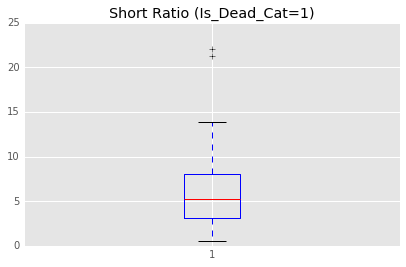

In [115]:
DCB_df = project_df[project_df['Is_Dead_Cat']==str(1)]
DCB_SR = DCB_df['Short_Ratio']
print DCB_SR.describe()
plt.boxplot(DCB_SR)
plt.title('Short Ratio (Is_Dead_Cat=1)')

### Short Ratio (Is_Dead_Cat = 0)

   Ticker  Chg_from_Hi  Chg_from_Lo  Chg_from_50davg  Short_Ratio Is_Dead_Cat
62   SMBK       -18.67         7.32            -1.16         3.22           0
63    UGI        -0.85        43.64             1.42         2.82           0
64   USAP       -14.36        91.64             3.98         3.43           0
65    HBP       -20.14        86.96            -2.65         0.10           0
66    ETW       -12.00        18.46             3.02         0.00           0
count    363.000000
mean       4.885014
std        5.996065
min        0.000000
25%        0.795000
50%        3.180000
75%        6.080000
max       39.380000
Name: Short_Ratio, dtype: float64


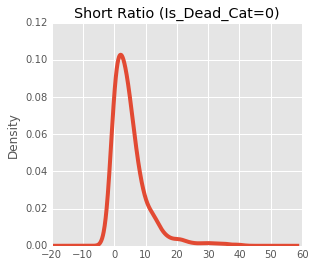

In [142]:
nonDCB_df = project_df[project_df['Is_Dead_Cat']==str(0)]
print nonDCB_df.head()

nonDCB_SR = nonDCB_df['Short_Ratio']
print nonDCB_SR.describe()
#plt.boxplot(nonDCB_SR)
project_df['Short_Ratio'].plot(kind="density", title="Short Ratio (Is_Dead_Cat=0)", figsize=(4,4))

As seen above, there are a few outliers in the data but the mean Short Ratio for the Dead Cat Bounce stocks is slightly higher than the mean Short Ratio for non DCB stocks. The range for non DCB stocks is much higher at 39.38 compared to ~22 for DCB stocks, however this is as expected due to the larger sample size of non DCB stocks

### Change from High, Low, Moving Average

count    425.000000
mean       1.932428
std       11.848646
min      -75.450000
25%       -0.830000
50%        2.230000
75%        5.710000
max       60.190000
Name: Chg_from_50davg, dtype: float64

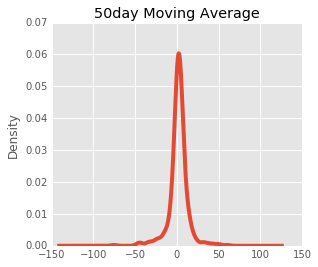

In [80]:
project_df['Chg_from_50davg'].plot(kind="density", title="50day Moving Average", figsize=(4,4))
project_df['Chg_from_50davg'].describe()

The distribution for the 50 day moving average looks relatively normal based on the above graph with a range of approximately 135. 

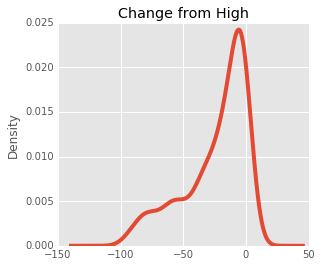

In [72]:
project_df['Chg_from_Hi'].plot(kind="density", title="Change from High", figsize=(4,4))

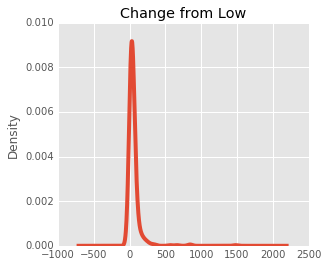

In [71]:
project_df['Chg_from_Lo'].plot(kind="density", title="Change from Low", figsize=(4,4))

In [144]:
 project_df.corr(method='pearson')

,Chg_from_Hi,Chg_from_Lo,Chg_from_50davg,Short_Ratio
Chg_from_Hi,1.000000,-0.034092,0.331380,-0.208651
Chg_from_Lo,-0.034092,1.000000,0.433408,-0.025188
Chg_from_50davg,0.331380,0.433408,1.000000,-0.083635
Short_Ratio,-0.208651,-0.025188,-0.083635,1.000000


The strongest association for our target variable appears to be a negative one between the Change from High statistic. However, since we will be using a logistic regression model and not a linear regression model this does not necessarily mean the other data is irrelevant. However this does raise the possibility of impacitng our hypothesis. If one of our variables proves to be more important in prediction, it may be the Change from high and not the Short Ratio.  

### Comparing Data

,Ticker,Chg_from_Hi,Chg_from_Lo,Chg_from_50davg,Short_Ratio,Is_Dead_Cat
0,USCR,-7.649554,72.938921,1.453999,4.083659,1
1,SRPT,-45.872218,110.614525,23.350694,3.639042,1
2,SPWR,-49.756256,14.603410,-8.774085,7.637297,1
3,CMA,-23.008850,29.013540,-8.893328,3.340925,1
4,AKS,-8.971963,166.120219,13.191348,2.565646,1


### Analysis Plan

Given that we have four different features for each stock we now want to make sure we drop any outliers, which can be done for each series in the dataframe. Then we would want to randomly group 70-75% of the DCB stocks and 70-75% of the non DCB stocks into a training dataset and group the remaining data into another test dataset. After this, we should be ready to train a model using the training dataset, predicting a value of '1' or '0' for each stock. A logistic regression model would probably be the best suited to make predictions on this dataset. If time allows, I'd like to try using a random forest model as well.